# Benchmark 4 - Número de Hosts

## Setup do Ambiente

### Imports

In [1]:
from setup import *

# from jupyter_datatables import init_datatables_mode

# %load_ext jupyter_require

# %reload_ext jupyter_require
# %requirejs d3 https://d3js.org/d3.v5.min
# init_datatables_mode()

# %matplotlib inline
# matplotlib.style.use('ggplot')

### Load Data

In [2]:
#folder_path = '../credentials/results/Benchmark4/'
#dfb4 = load_data(folder_path)
dfb4 = pd.DataFrame()

In [3]:
folder_path = '../credentials/results/Benchmark5/'
dfb5 = load_data(folder_path)

In [4]:
df = pd.concat([dfb4,dfb5])
df.sample(10)

,RTT,Benchmark,NumberHosts,NumberSenders,NumberReceivers,MessageSize,NumberMessages,Henrique
190,0,5,1,1,1,100,1000,True
294,0,5,1,1,1,100,1000,True
974,0,5,1,1,1,100,1000,True
258,0,5,1,1,1,100,1000,True
845,0,5,1,1,1,100,1000,True
725,0,5,1,1,1,100,1000,True
257,0,5,1,1,1,100,1000,True
763,0,5,1,1,1,100,1000,True
127,0,5,1,1,1,100,1000,True
232,0,5,1,1,1,100,1000,True


## Experimentos

### Experimento B4E1 - Número de Pares de Agentes

In [5]:
b4e1 = df[df.Benchmark == 4]
b4e1 = b4e1[b4e1.MessageSize == 1]
b4e1 = b4e1[b4e1.NumberMessages == 1000]
b4e1 = b4e1[["NumberSenders", "RTT"]]

b5e1 = df[df.Benchmark == 5]
b5e1 = b5e1[b5e1.MessageSize == 1]
b5e1 = b5e1[b5e1.NumberMessages == 1000]
b5e1 = b5e1[["NumberSenders", "RTT"]]

In [6]:
b4e1 = b4e1.groupby(['NumberSenders']).agg(['mean', 'min', 'max', 'std', 'count'])
b4e1.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b4e1 = b4e1.reset_index()

b5e1 = b5e1.groupby(['NumberSenders']).agg(['mean', 'min', 'max', 'std', 'count'])
b5e1.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b5e1 = b5e1.reset_index()
b5e1

,NumberSenders,RTT_mean,RTT_min,RTT_max,RTT_std,Messages_Delivered
0,1,0.327,0,4,0.490216,1000
1,10,0.805,0,23,1.210967,1000
2,20,1.326,0,101,3.716926,1000
3,40,3.219,0,37,4.889882,1000
4,60,7.050,0,260,13.456172,1000


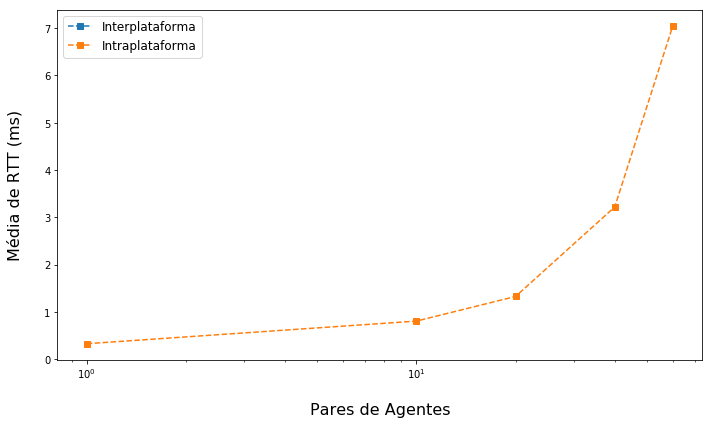

In [7]:
plot_results2([b4e1, b5e1], yerror=False, legentOut=False, logScale=True,
             title='title', 
             x_label='Pares de Agentes', 
             x_column='NumberSenders',
             legend = ['Interplataforma', 'Intraplataforma'])

### Experimento B4E2 - Tamanho das Mensagens

In [8]:
b4e2 = df[df.Benchmark == 4]
b4e2 = b4e2[b4e2.NumberSenders == 100]
b4e2 = b4e2[b4e2.NumberMessages == 10]
b4e2 = b4e2[["MessageSize", "RTT"]]

b5e2 = df[df.Benchmark == 5]
b5e2 = b5e2[b5e2.NumberSenders == 100]
b5e2 = b5e2[b5e2.NumberMessages == 10]
b5e2 = b5e2[["MessageSize", "RTT"]]

In [9]:
b4e2 = b4e2.groupby(['MessageSize']).agg(['mean', 'min', 'max', 'std', 'count'])
b4e2.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b4e2 = b4e2.reset_index()

b5e2 = b5e2.groupby(['MessageSize']).agg(['mean', 'min', 'max', 'std', 'count'])
b5e2.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b5e2 = b5e2.reset_index()
b5e2

,MessageSize,RTT_mean,RTT_min,RTT_max,RTT_std,Messages_Delivered
0,1,22.6,0,90,31.426104,10


/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


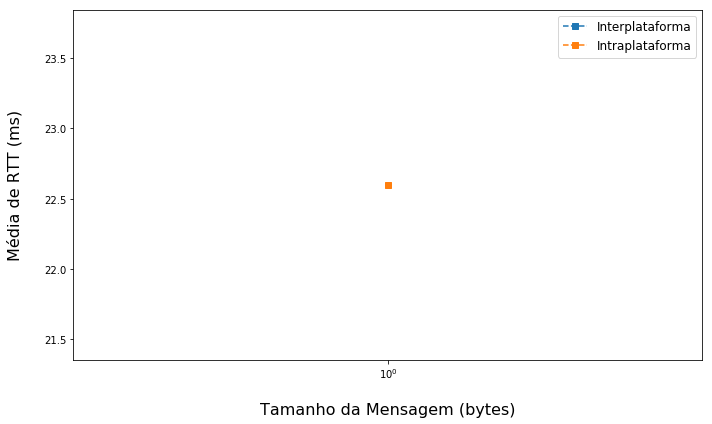

In [10]:
plot_results2([b4e2, b5e2], yerror=False, legentOut=False, logScale=True,
             title='title', 
             x_label='Tamanho da Mensagem (bytes)', 
             x_column='MessageSize',
             legend = ['Interplataforma', 'Intraplataforma'])

### Experimento B4E3- Número de Mensagens

In [15]:
b4e3 = df[df.Benchmark == 4]
b4e3 = b4e3[b4e3.NumberSenders == 100]
b4e3 = b4e3[b4e3.MessageSize == 1]
b4e3 = b4e3[["NumberMessages", "RTT"]]

b5e3 = df[df.Benchmark == 5]
b5e3 = b5e3[b5e3.NumberSenders == 100]
b5e3 = b5e3[b5e3.MessageSize == 1]
b5e3 = b5e3[["NumberMessages", "RTT"]]

In [16]:
b4e3 = b4e3.groupby(['NumberMessages']).agg(['mean', 'min', 'max', 'std', 'count'])
b4e3.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b4e3 = b4e3.reset_index()

b5e3 = b5e3.groupby(['NumberMessages']).agg(['mean', 'min', 'max', 'std', 'count'])
b5e3.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b5e3 = b5e3.reset_index()
b5e3

,NumberMessages,RTT_mean,RTT_min,RTT_max,RTT_std,Messages_Delivered
0,1,1.0,1,1,NaN,1
1,10,22.6,0,90,31.426104,10


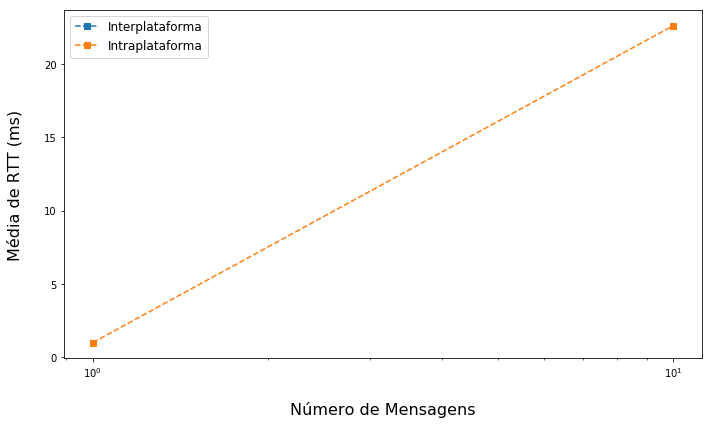

In [17]:
plot_results2([b4e3, b5e3], yerror=False, legentOut=False, logScale=True,
             title='title', 
             x_label='Número de Mensagens', 
             x_column='NumberMessages',
             legend = ['Interplataforma', 'Intraplataforma'])